# 🤔 How Much of the World Has Access to the Internet?
## ↴ Here are some answers

⚙️ First of all we need tools for our research, lets add some 

In [18]:
# Import pandas for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
# Import seaborn for data visualisation
import seaborn as sns
import plotly.express as px


👌 Ok, now it time to get and tidy up data

In [19]:
# Read input tables and prepare data, simplify column names
internet  	 = pd.read_csv('data/internet.csv').rename(columns={'Internet_Usage':'Usage'})
people    	 = pd.read_csv('data/people.csv').rename(columns={'Users':'Users'})
broadband 	 = pd.read_csv('data/broadband.csv').rename(columns={'Broadband_Subscriptions':'Broadband'})

# Read additional table (fresh data from the world bank database regarding countries regions)
regions_prep = pd.read_csv('add_data/world-regions-according-to-the-world-bank.csv')
regions 	 = regions_prep.drop(columns=['Year']).rename(columns={'World Region according to the World Bank':'Region'})

In [20]:
# Merge Data into single dataframe
ip 			= pd.merge(internet, people,    how='outer', left_on=['Entity','Code','Year'], 	right_on = ['Entity','Code','Year'])
ipb 		= pd.merge(ip,       broadband, how='outer', left_on=['Entity','Code','Year'], 	right_on = ['Entity','Code','Year'])
ipbr 		= pd.merge(ipb,      regions,   how='outer', left_on=['Entity','Code'], 		right_on = ['Entity','Code'])

# Simplify name for dataframe
df        	= ipbr.sort_values(['Region','Entity','Year'], ascending=[True,True,True])
df.head()

,Entity,Code,Year,Usage,Users,Broadband,Region
142,American Samoa,ASM,1990.0,0.0,0.0,NaN,East Asia and Pacific
143,American Samoa,ASM,1991.0,0.0,0.0,NaN,East Asia and Pacific
144,American Samoa,ASM,1992.0,0.0,0.0,NaN,East Asia and Pacific
145,American Samoa,ASM,1993.0,0.0,0.0,NaN,East Asia and Pacific
146,American Samoa,ASM,1994.0,0.0,0.0,NaN,East Asia and Pacific


In [21]:
# Create some beautiful vis

map_df = df.groupby(by=['Region','Entity','Code'])
map_df = map_df.apply(lambda x: x.ffill().bfill()['Usage'].max()).reset_index().rename(columns={0:'Usage'}).dropna()

fig = px.scatter_geo(map_df, locations="Code", color="Region",
					hover_name="Entity", size="Usage",
					scope='world', size_max=20, fitbounds=False, labels=False,
					width=1000, height=500)
fig.show()

In [22]:
# Region code added for better visual representation, such long names don't fit in the screen
usage_top_r_code = df['Region'].replace({'East Asia and Pacific': 'EAP',
                                         'Europe and Central Asia': 'ECA', 
                                         'Latin America and Caribbean': 'LAC', 
                                         'Middle East and North Africa': 'MENA',
                                         'North America': 'NA',
                                         'South Asia': 'SA'
                                        })

df = df.join(usage_top_r_code, lsuffix='', rsuffix='_Code') # Adding new column

df.head() # See what we got

,Entity,Code,Year,Usage,Users,Broadband,Region,Region_Code
142,American Samoa,ASM,1990.0,0.0,0.0,NaN,East Asia and Pacific,EAP
143,American Samoa,ASM,1991.0,0.0,0.0,NaN,East Asia and Pacific,EAP
144,American Samoa,ASM,1992.0,0.0,0.0,NaN,East Asia and Pacific,EAP
145,American Samoa,ASM,1993.0,0.0,0.0,NaN,East Asia and Pacific,EAP
146,American Samoa,ASM,1994.0,0.0,0.0,NaN,East Asia and Pacific,EAP


## ◉ 1. What are the top 5 countries with the highest internet use (by population share)?
🔍 Lets try to figure out

In [23]:
# Get top 5 countries by internet usage
entity_group 	= df.groupby(['Entity']) 													# Group df by country names
usage_max 		= entity_group['Usage','Region','Region_Code'].apply(lambda x: x.max()).reset_index() # Get max values in each
usage_top 		= usage_max.sort_values(by='Usage', ascending=False).head(5) 				# Get top 5 rows

usage_top # See what we got

,Entity,Usage,Region,Region_Code
19,Bahrain,99.701504,Middle East and North Africa,MENA
212,Qatar,99.652849,Middle East and North Africa,MENA
132,Kuwait,99.598850,Middle East and North Africa,MENA
146,Liechtenstein,99.546612,Europe and Central Asia,ECA
265,United Arab Emirates,99.149998,Middle East and North Africa,MENA


📝 We can also note that 4 of the top 5 countries are from the Middle East and North Africa

## ◉ 2. How many people had internet access in those countries in 2019?
🔍 Let's find out

In [24]:
# Preparings
select_date 	= (df['Year'] == 2019)
usage_top_list 	= usage_top['Entity'].tolist()

# Select Date, remove columns and fill NAs with previous values
df_by_date = df[select_date].drop(columns=['Usage', 'Broadband', 'Region', 'Code','Region_Code'])#.fillna(method='ffill')
df_by_date = df_by_date[df_by_date['Entity'].isin(usage_top_list)].sort_values(['Users'], ascending=[False])

df_by_date # See what we got

,Entity,Year,Users
7233,United Arab Emirates,2019.0,9133361.0
3673,Kuwait,2019.0,4420795.0
5781,Qatar,2019.0,2797495.0
509,Bahrain,2019.0,1489735.0
4048,Liechtenstein,2019.0,NaN


⚠️ As we can see, unfortunately we don't have any record of Liechtenstein internet users for 2019. But no need to worry. At this point we can just take the value from previous years, let's do that below.

In [25]:
# Select Date, remove columns and fill NAs with previous values
df_by_date = df[select_date].drop(columns=['Usage', 'Broadband', 'Region', 'Code']).fillna(method='ffill')
df_by_date = df_by_date[df_by_date['Entity'].isin(usage_top_list)].sort_values(['Users'], ascending=[False])

df_by_date # See what we got

,Entity,Year,Users,Region_Code
7233,United Arab Emirates,2019.0,9133361.0,MENA
3673,Kuwait,2019.0,4420795.0,MENA
5781,Qatar,2019.0,2797495.0,MENA
4048,Liechtenstein,2019.0,1650831.0,ECA
509,Bahrain,2019.0,1489735.0,MENA


📊 That's better, and now we can even graph this data

In [26]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Year,Users,Region_Code
7233,United Arab Emirates,2019.0,9133361.0,MENA
3673,Kuwait,2019.0,4420795.0,MENA
5781,Qatar,2019.0,2797495.0,MENA
4048,Liechtenstein,2019.0,1650831.0,ECA
509,Bahrain,2019.0,1489735.0,MENA


🤩 Just perfect. <br>
📝 Now we know that of the countries with the highest percentage of the population using the Internet, the UAE is the leader in the number of users. 
In other words, the UAE is the most populous of the top five countries with the highest percentage of people using the Internet.

## ◉ 3. What are the top 5 countries with the highest internet use for each of the following regions: 'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'?
🔍 Ok, data

In [27]:
# Prepare data
regions_group 	= usage_max.groupby(['Region']) # Lest use usage_max from the 1st research and group it by Region column

# Sort rows in every group by Usage column and get top 5 countries of every Region
usage_top_r 	= regions_group['Entity','Usage','Region_Code'] # Prepare dataframe
usage_top_r 	= usage_top_r.apply(lambda x: x.sort_values(by='Usage',ascending=False).head(5)).reset_index() # Sort and get top 5
usage_top_r 	= usage_top_r[usage_top_r.Region != 'Sub-Saharan Africa'].drop(columns=['level_1']) # Drop unnecessary region

usage_top_r.head(10) # See what we got

,Region,Entity,Usage,Region_Code
0,East Asia and Pacific,South Korea,96.157583,EAP
1,East Asia and Pacific,Brunei,95.000000,EAP
2,East Asia and Pacific,Japan,93.182721,EAP
3,East Asia and Pacific,Hong Kong,91.743400,EAP
4,East Asia and Pacific,New Zealand,90.811093,EAP
5,Europe and Central Asia,Liechtenstein,99.546612,ECA
6,Europe and Central Asia,Iceland,99.010954,ECA
7,Europe and Central Asia,Luxembourg,98.136699,ECA
8,Europe and Central Asia,Denmark,98.046435,ECA
9,Europe and Central Asia,Norway,98.000004,ECA


👓 It is not easy to see the necessary information in tabular form, so let's try to visualize the data obtained.

In [28]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Region,Entity,Usage,Region_Code
0,East Asia and Pacific,South Korea,96.157583,EAP
1,East Asia and Pacific,Brunei,95.000000,EAP
2,East Asia and Pacific,Japan,93.182721,EAP
3,East Asia and Pacific,Hong Kong,91.743400,EAP
4,East Asia and Pacific,New Zealand,90.811093,EAP
5,Europe and Central Asia,Liechtenstein,99.546612,ECA
6,Europe and Central Asia,Iceland,99.010954,ECA
7,Europe and Central Asia,Luxembourg,98.136699,ECA
8,Europe and Central Asia,Denmark,98.046435,ECA
9,Europe and Central Asia,Norway,98.000004,ECA


📝 Not the best way to display this data, but it is quite visual. We see each region as a color and country names on the x-axis, as well as the percentage of Internet use for each country. We can conclude that South Asia does not have a very large percentage of its population using the Internet.

## ◉ 4. Create a visualization for those five regions' internet usage over time.
🔍 Let's see

In [29]:
# Preparings
usage_top_list_r 	= usage_top_r['Region'].tolist() # Get all the region names from the previous research
df_by_date_r 		= df.drop(columns=['Users', 'Broadband', 'Code']) # Get rid of some unnecessary columns

# Getting only countries from the selected regions and sorting them
df_by_date_r = df_by_date_r[df_by_date_r['Region'].isin(usage_top_list_r)].sort_values(['Region','Entity','Year'], ascending=True)
# Filling NaN values with data from previous years
df_by_date_r = df_by_date_r.groupby(['Entity']) # Grouping by country and sort by year
df_by_date_r = df_by_date_r['Year','Region','Entity','Usage','Region_Code'] # Prepare frame for filling NaN
df_by_date_r = df_by_date_r.apply(lambda x: x.sort_values('Year', ascending=True).fillna(method='ffill')).reset_index() #Replace na

# Grouping by Years and Reagions
df_by_date_r = df_by_date_r.groupby(['Region','Region_Code','Year']) # Grouping by Region and Year
df_by_date_r = df_by_date_r['Year','Region','Usage','Region_Code'].apply(lambda x: x['Usage'].mean()).reset_index()  # Getting mean
df_by_date_r = df_by_date_r.sort_values(['Region','Year'], ascending=True).rename(columns={0: "Usage"}) # Rename 0 and sort

df_by_date_r.head() # See what we got

,Region,Region_Code,Year,Usage
0,East Asia and Pacific,EAP,1990.0,0.017463
1,East Asia and Pacific,EAP,1991.0,0.040730
2,East Asia and Pacific,EAP,1992.0,0.099224
3,East Asia and Pacific,EAP,1993.0,0.150024
4,East Asia and Pacific,EAP,1994.0,0.306137


🤩 Looks like everything is perfect, lets represent the data visualy

In [30]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Region,Region_Code,Year,Usage
0,East Asia and Pacific,EAP,1990.0,0.017463
1,East Asia and Pacific,EAP,1991.0,0.040730
2,East Asia and Pacific,EAP,1992.0,0.099224
3,East Asia and Pacific,EAP,1993.0,0.150024
4,East Asia and Pacific,EAP,1994.0,0.306137
...,...,...,...,...
181,South Asia,SA,2016.0,24.702431
182,South Asia,SA,2017.0,29.881000
183,South Asia,SA,2018.0,29.881000
184,South Asia,SA,2019.0,29.876720


〽️ And another representation of the data using Seaborn below (code hidden)

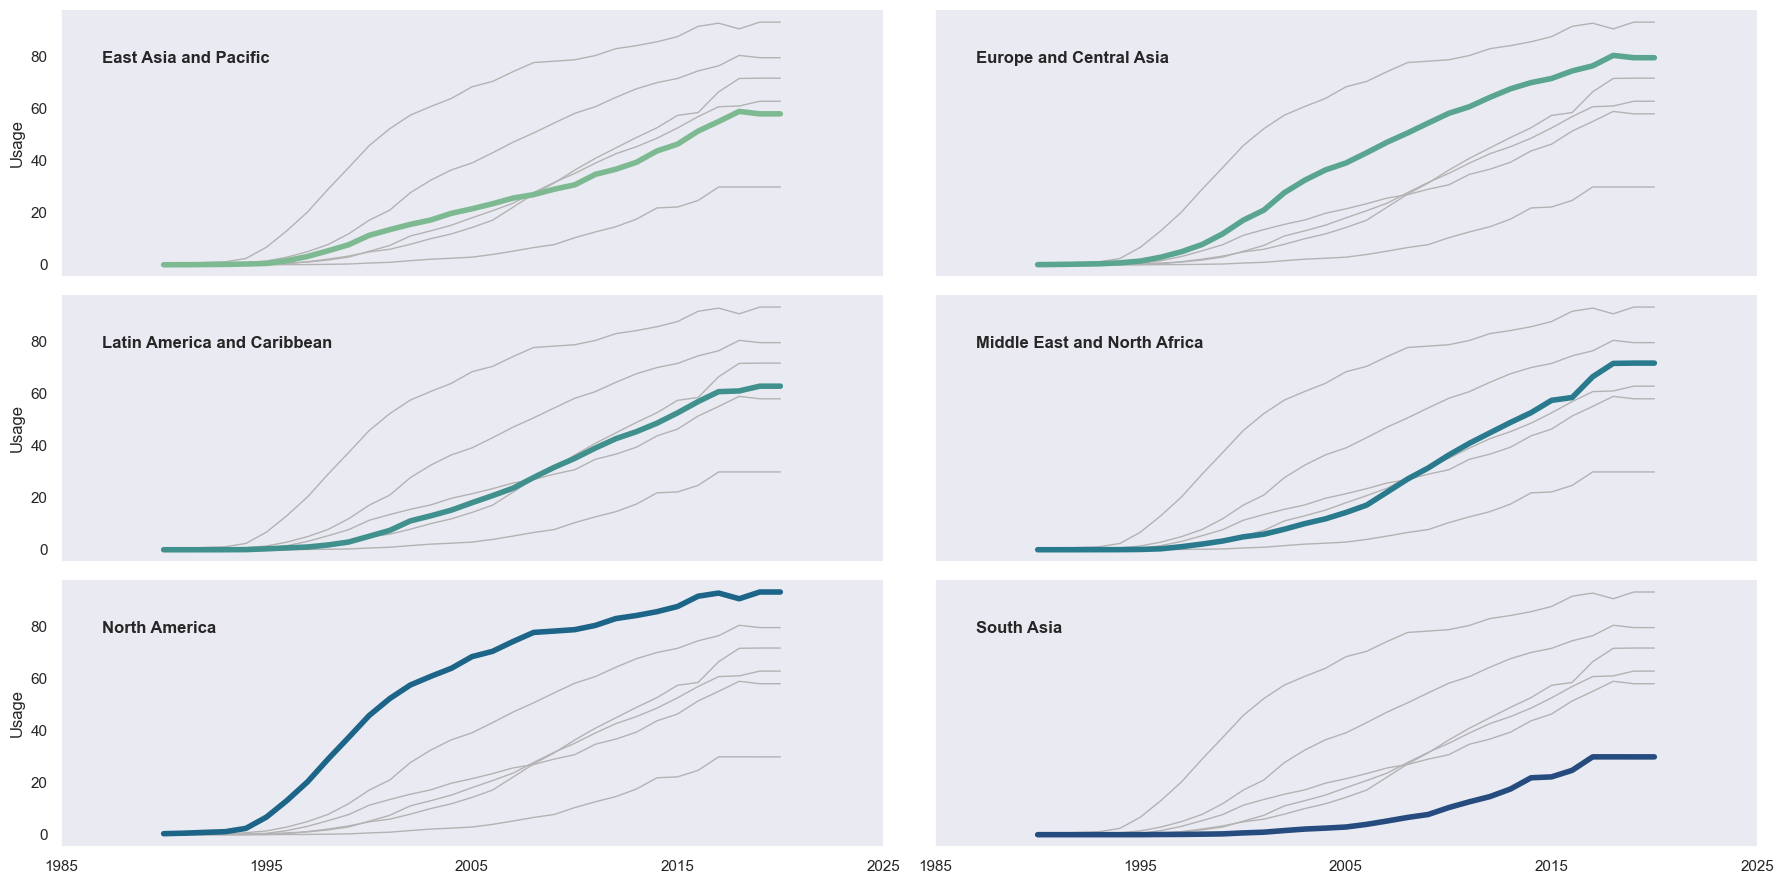

In [31]:
sns.set_theme(style="dark")
lines = df_by_date_r

# Plot each year's time series in its own facet
g = sns.relplot(
    data=lines,
    x="Year", y="Usage", col="Region", hue="Region",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=2, height=3, aspect=3, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .80, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=lines, x="Year", y="Usage", units="Region",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Usage")
g.tight_layout()
plt.show()

📝 Now we see that over the past 25 years, North Americans have connected to the Internet at a higher rate than people in other countries. The growth of Internet use by the population is growing at a rapid pace for NA.
The same cannot be said for South Asian countries. The percentage of the population using the Internet there is still low, and unfortunately, there are no recent data for these countries

## ◉ 5. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?
🔍 What could be easier?

In [32]:
# Group by countries from the 1st research
entity_group
# Sort by years for na fill
cor_df = entity_group.apply(lambda x: x.sort_values(by='Year', ascending=True).fillna(method='ffill').reset_index())


select_date = (cor_df['Year'] == 2019) # Selecting the date
cor_df 		= cor_df[select_date].dropna().drop(columns=['index','Code','Users']) # Cleaning

cor_df # See what we got


,,Entity,Year,Usage,Broadband,Region,Region_Code
Entity,,,,,,,
Afghanistan,24,Afghanistan,2019.0,11.447688,0.051741,South Asia,SA
Albania,29,Albania,2019.0,69.642855,15.140735,Europe and Central Asia,ECA
Algeria,29,Algeria,2019.0,49.038468,8.321684,Middle East and North Africa,MENA
Andorra,28,Andorra,2019.0,91.567467,47.131264,Europe and Central Asia,ECA
Angola,29,Angola,2019.0,21.400000,0.374130,Sub-Saharan Africa,Sub-Saharan Africa
...,...,...,...,...,...,...,...
Venezuela,29,Venezuela,2019.0,64.313364,8.980956,Latin America and Caribbean,LAC
Vietnam,29,Vietnam,2019.0,68.700000,15.345280,East Asia and Pacific,EAP
Yemen,29,Yemen,2019.0,26.718355,1.309927,Middle East and North Africa,MENA


🕶 Okay, now let's prepare visual images for this data (code hidden)

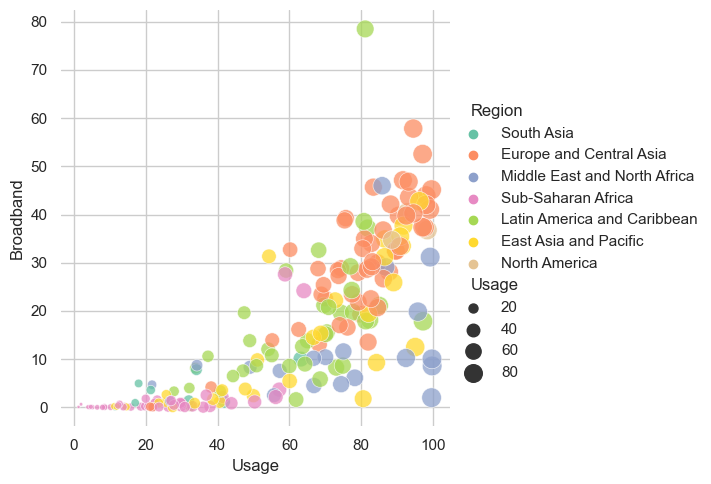

In [33]:
sns.set_theme(style="whitegrid")

# Load the example planets dataset
dots = cor_df

g = sns.relplot(
    data=dots,
    x="Usage", y="Broadband",
    hue="Region", size="Usage",
    palette="Set2", sizes=(5, 200), alpha=.75
)
g.set(xscale="linear", yscale="linear")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
plt.show(g)

![Screen-Shot-2022-11-14-at-2-06-40-PM](./Screen-Shot-2022-11-14-at-2-06-40-PM.png)

📝 The correlation is positive, high (strong), non-linear, hyperbolic, and upward trending. 
This tells us that the level of engagement of the population depends to a rather large extent on the subscription to broadband Internet access. Which makes sense.

## ◉ 6. Summarize my findings

📝 1. Countries in the Middle East and North Africa have the highest level of Internet usage
 
📝 2. The United Arab Emirates is the most populous of the five countries with the highest percentage of people using the Internet.

📝 3. South Asia has a low percentage of people using the Internet.

📝 4. Over the past 25 years, people in North America have connected to the Internet more often than people in other countries. Population growth in Internet use is increasing rapidly for NA countries. 
The same cannot be said for South Asian countries. The percentage of the population using the Internet is still low there.

📝 5. The correlation between Internet usage (share of population) and broadband subscriptions in 2019 is positive, high (strong), nonlinear, hyperbolic, and trending upward. 
This tells us that the level of population engagement is quite strongly influenced by the availability of broadband subscriptions. Which makes sense.
For example, most countries in Sub-Saharan Africa region have low levels of broadband subscribers and low levels of Internet use. Countries in Europe and Central Asia have a large number of broadband subscribers, and the level of Internet usage is quite high.

👋 Thanks for you time